In [2]:
import numpy as np
import ast # for string to list 
import matplotlib.pyplot as plt

# `ACEpotentials.jl`: Silicon datasets

## Dataset info

In [116]:
en_si = np.loadtxt('./datasets/Si2_energy.dat').T
en_si[0,np.argmin(en_si[1])]

2.20707071

## OOD-Test (ecost50, correct r0, with pairdists)

### Coefficients

(-1e-05, 1e-05)

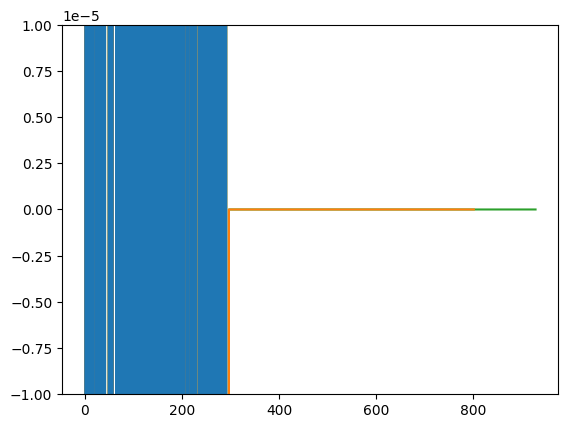

In [129]:
for i,coeffs in enumerate(coeffs_pure['Si3'][::-1]):
    # print(len(coeffs))
    plt.plot(coeffs,color='C'+str(2-i))
plt.ylim(-1e-5,1e-5)

Text(0.5, 0, 'Coefficient index')

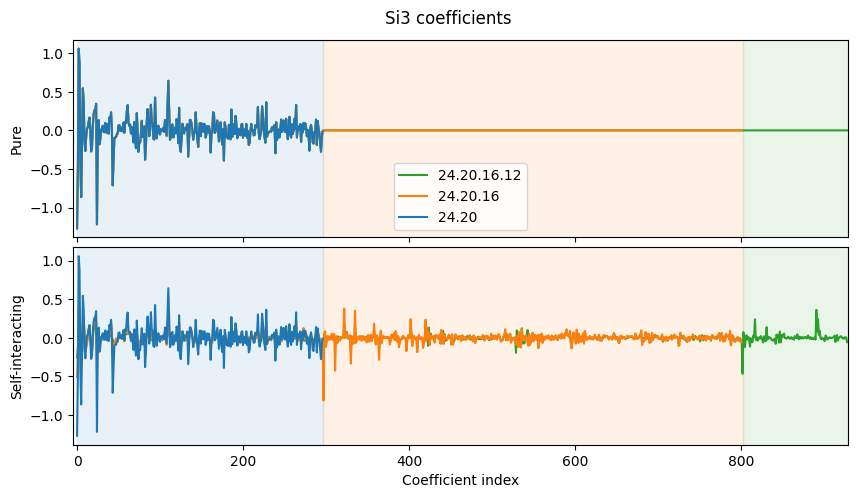

In [131]:
# Purified # 
with open('acejulia/Si_purify_OOD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs_pure['Si2'].append(line_list)
    elif (i<4) | (i==9):
        coeffs_pure['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs_pure['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs_pure['Si5'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_OOD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs['Si2'].append(line_list)
    elif (i<4) | (i==9):
        coeffs['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs['Si5'].append(line_list)

# Checking similarity # 
dset = 'Si3'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929)
    # axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')

Text(0.5, 0, 'Coefficient index')

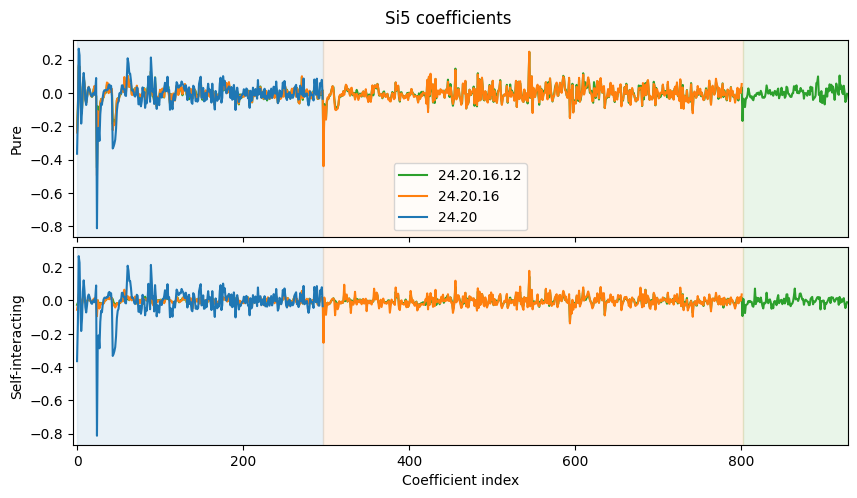

### Errors

#### Data load

In [80]:
# MAE # 
errs = {}
errs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs['train']['Si3'] = [7.514078691201576e-5,8.342407291820563e-5,9.917514633343671e-5]
errs['train']['Si4'] = [0.003085885978980514,1.686203177087009e-11,2.4465407477691768e-11]
errs['train']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs['val']['Si2'] = [2.6798167614910544,2.679816761618633,2.679816761876522]
errs['val']['Si3'] = [3.804971636814831,3.804971636814831,19.1013800390616]
errs['val']['Si4'] = [1.8509284013997713,3.1560994092361545,4.812692631112139]
errs['val']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs_pure = {}
errs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs_pure['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs_pure['train']['Si3'] = [7.514078691201576e-5,7.514078626627452e-5,7.51407866300724e-5]
errs_pure['train']['Si4'] = [0.0030858859785439564,7.521521183662116e-12,7.60337570682168e-12]
errs_pure['train']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

errs_pure['val']['Si2'] = [2.679816761510956,2.6798167614772663,2.679816761503127]
errs_pure['val']['Si3'] = [3.8049718130040167,3.8049716552447026,3.8049717081717573]
errs_pure['val']['Si4'] = [1.8509284013241813,2.49272505951872,2.490267071497841]
errs_pure['val']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.02548843020945877]
ferrs['train']['Si4'] = [1.0782276506088444,0.2888260281035634,0.31531139411432735]
ferrs['train']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs['val']['Si2'] = [1.666714735904054,1.6667147358113914,1.6667147357871739]
ferrs['val']['Si3'] = [2.858206490306253,4.299827323724238,11.106770035297926]
ferrs['val']['Si4'] = [2.0021428579379537,1.2547983469787605,1.987820565434771]
ferrs['val']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs_pure = {}
ferrs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs_pure['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs_pure['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.025717188864445368]
ferrs_pure['train']['Si4'] = [1.078227650673339,0.40436444164669233,0.4045728182164105]
ferrs_pure['train']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

ferrs_pure['val']['Si2'] = [1.666714735900488,1.6667147359008967,1.6667147359080952]
ferrs_pure['val']['Si3'] = [2.8582065019775955,2.8582063833692737,2.858206563146323]
ferrs_pure['val']['Si4'] = [2.0021428580827516,1.5841059539832745,1.5796121032057044]
ferrs_pure['val']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

#### MAE vs. dataset 

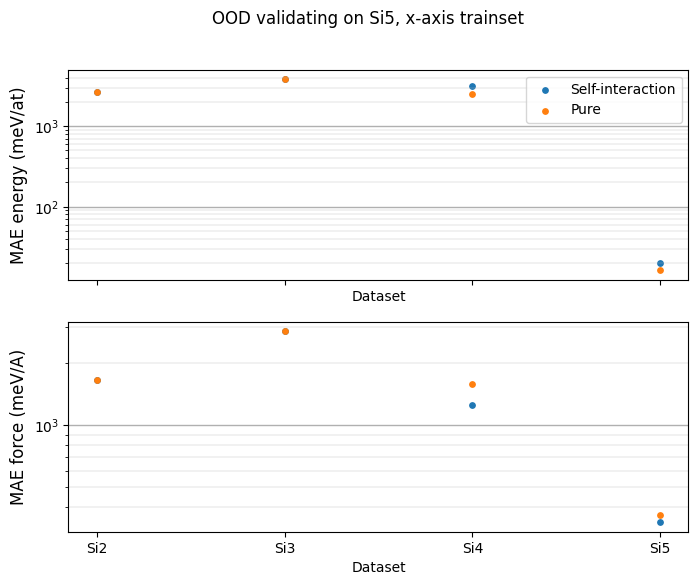

In [ ]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si2'][0], en_err['Si3'][0], en_err['Si4'][1], en_err['Si5'][2]])
yerr_pure = np.array([en_err_pure['Si2'][0], en_err_pure['Si3'][0], en_err_pure['Si4'][1], en_err_pure['Si5'][2]])
yerr_ferrs = np.array([ferrs_err['Si2'][0], ferrs_err['Si3'][0], ferrs_err['Si4'][1], ferrs_err['Si5'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si2'][0], ferrs_err_pure['Si3'][0], ferrs_err_pure['Si4'][1], ferrs_err_pure['Si5'][2]])

## PLOT ## 
x = [2, 3, 4, 5]
xticks = ['Si2', 'Si3', 'Si4', 'Si5']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('OOD validating on Si5, x-axis trainset')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)

for axes in ax:
    axes.set_xlabel('Dataset')
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets 

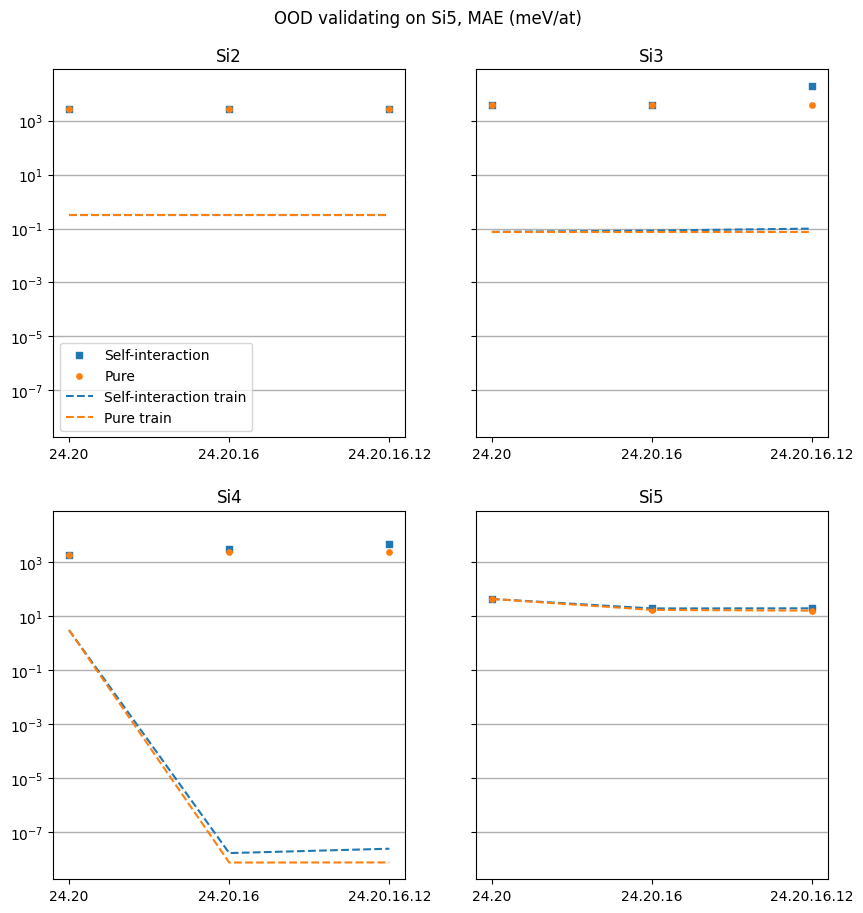

In [86]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])


## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(2,2, figsize=(10,10), dpi=100, sharey=True)
f.suptitle('OOD validating on Si5, MAE (meV/at)')
f.subplots_adjust(top=0.92)
trainsets = ['Si2', 'Si3', 'Si4', 'Si5']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, color='C0', marker='s', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

    # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[0].legend(loc='lower left')

### Dimers

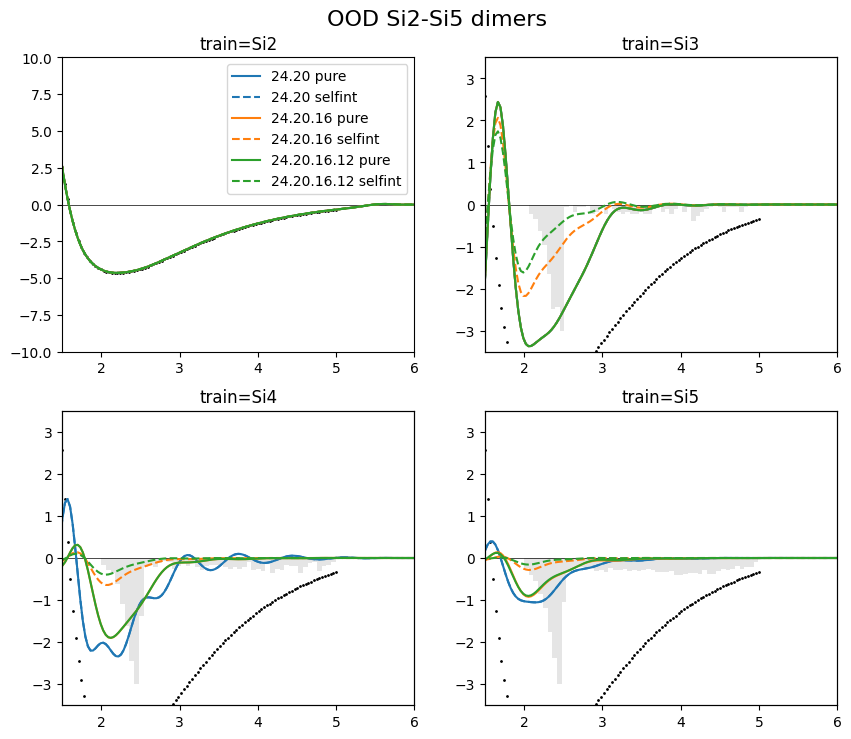

In [71]:
en_si = np.loadtxt('./datasets/Si2_energy.dat').T

g,gax = plt.subplots(2,2, figsize=(10,8), dpi=100)
g.suptitle('OOD Si2-Si5 dimers', fontsize=16)
g.subplots_adjust(top=0.92, hspace=0.2)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
dsets = ['Si2', 'Si3', 'Si4', 'Si5']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(f'train={dset}')
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    if i != 0:
        axes_flat[i].set_ylim(-3.5, 3.5)
        bins, counts = np.loadtxt(f'datasets/pair_distributions/{dset}_histogram.dat').T
        # Plot histogram as bar
        axes_flat[i].bar(bins, -counts*3/np.max(counts), width=bins[-1]-bins[-2], bottom=0, align='edge', alpha=0.1, color='k', label=f'{dset} histogram')
        # Add secondary y-axis for the histogram
        ax_hist = axes_flat[i].twinx()
        # ax_hist.set_ylabel('Pair distribution', fontsize=10)
        ax_hist.set_ylim(-np.max(counts)*3/np.max(counts), 0)
        ax_hist.set_yticks([])
    for j, basis in enumerate(basis_tags):
        # Load
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        # Plot
        axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
axes_flat[0].legend(fontsize=10)



## In-domain Test

### Coefficients

Text(0.5, 0, 'Coefficient index')

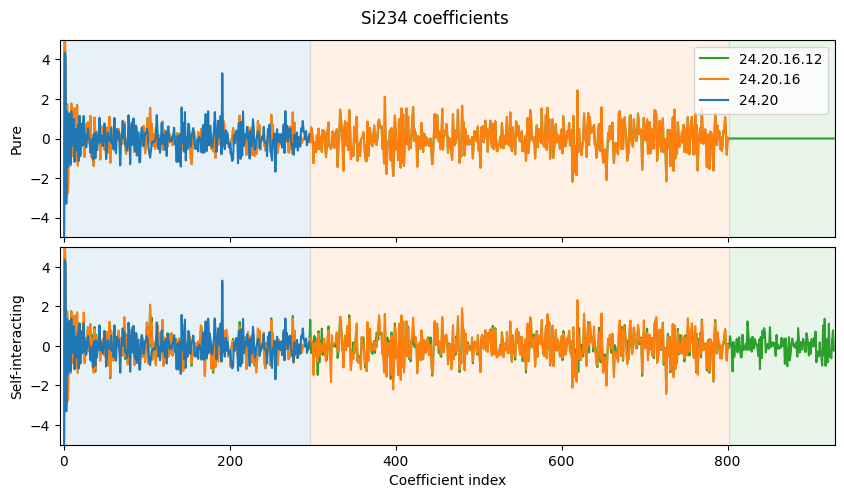

In [116]:
# Purified # 
with open('acejulia/Si_purify_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs_pure['Si23'].append(line_list)
    elif i<6:
        coeffs_pure['Si234'].append(line_list)
    else:
        coeffs_pure['Si2345'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs['Si23'].append(line_list)
    elif i<6:
        coeffs['Si234'].append(line_list)
    else:
        coeffs['Si2345'].append(line_list)

# Checking similarity # 
dset = 'Si234'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929); axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')

In [117]:
# plt.plot(np.array(coeffs_pure['Si234'][1][297:802]) - np.array(coeffs_pure['Si234'][2][297:802]))

### Errors

#### Data load

In [73]:
# MAE # 
errs = {}
errs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.00031473502299377286]
errs['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875,  0.00030326815984153653]
errs['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574792344071]

errs['val']['Si23'] = [0.7314496303867745, 2.145457214576374, 5.201990817811364]
errs['val']['Si234'] = [0.5542576591895013, 0.6402825581082853,  0.5059191758755059]
errs['val']['Si2345'] = [0.04646340991892066, 0.011582635910943282, 0.009026467482877706]


errs_pure = {}
errs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.0003147350223389367]
errs_pure['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875, 0.0003032681587076998]
errs_pure['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574802081348]

errs_pure['val']['Si23'] = [0.7314493916057563, 0.7314494996472295, 0.7314496311553558]
errs_pure['val']['Si234'] = [0.5542576591918005, 0.7598177556880328, 0.7598177346910779]
errs_pure['val']['Si2345'] = [0.046463409918951586, 0.01156226949635493, 0.008962682054469042]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['train']['Si23'] = [0.010347197346083458, 0.010224281927640713, 0.010215513230177633]
ferrs['train']['Si234'] = [0.268123466231014, 0.01735149742814704, 0.017074917681626868]
ferrs['train']['Si2345'] = [0.4434120400086316, 0.27871369480902275, 0.23009000284029432]

ferrs['val']['Si23'] = [5.202882369477908, 8.785332757678953, 10.867899320684742]
ferrs['val']['Si234'] = [1.1525539959336513, 2.9861313822092117, 3.941926090041813]
ferrs['val']['Si2345'] = [0.4900724250143046, 0.309479880769104, 0.27748206529634856]


ferrs_pure = {}
ferrs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['train']['Si23'] = [0.010347197342848648, 0.01034719733562278, 0.010347197346557126]
ferrs_pure['train']['Si234'] = [0.26812346623277344, 0.017291320690499955, 0.017291320687248105]
ferrs_pure['train']['Si2345'] = [0.4434120400091624, 0.27869627411419673, 0.22856815917391504]

ferrs_pure['val']['Si23'] = [5.202882206225266, 5.202882370789215, 5.202882452351486]
ferrs_pure['val']['Si234'] = [1.1525539959956859, 3.628515785410515, 3.628515824311212]
ferrs_pure['val']['Si2345'] = [0.490072425014623, 0.30930696936371477, 0.2761654992913551]

#### MAE vs. dataset

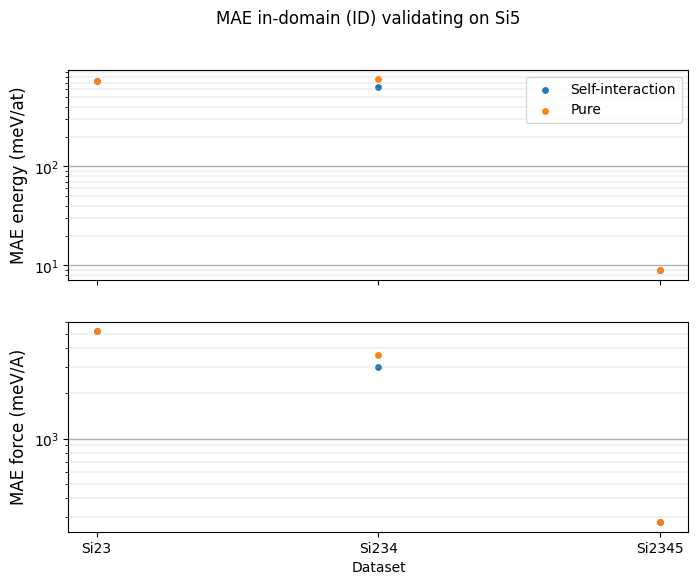

In [76]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si23'][0], en_err['Si234'][1], en_err['Si2345'][2]])
yerr_pure = np.array([en_err_pure['Si23'][0], en_err_pure['Si234'][1], en_err_pure['Si2345'][2]])
yerr_ferrs = np.array([ferrs_err['Si23'][0], ferrs_err['Si234'][1], ferrs_err['Si2345'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si23'][0], ferrs_err_pure['Si234'][1], ferrs_err_pure['Si2345'][2]])


## PLOT ## 
x = [3, 4, 5]
xticks = ['Si23', 'Si234', 'Si2345']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('MAE in-domain (ID) validating on Si5')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('Dataset')
for axes in ax:
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets

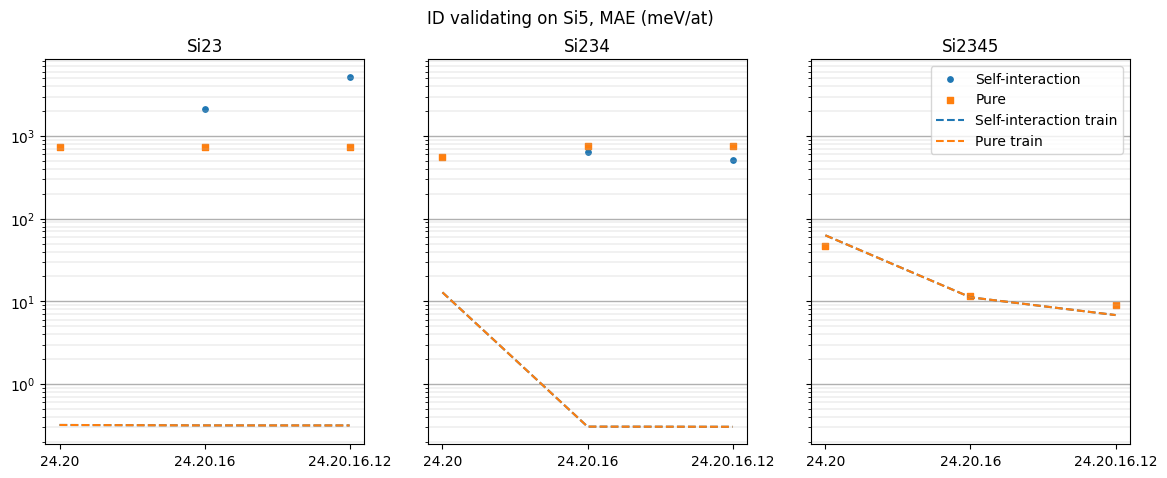

In [75]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])

## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(1,3, figsize=(14,5), dpi=100, sharey=True)
f.suptitle('ID validating on Si5, MAE (meV/at)')
trainsets = ['Si23', 'Si234', 'Si2345']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, marker='o', color='C0', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, marker='s', color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

#     # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[-1].legend()

### Dimers

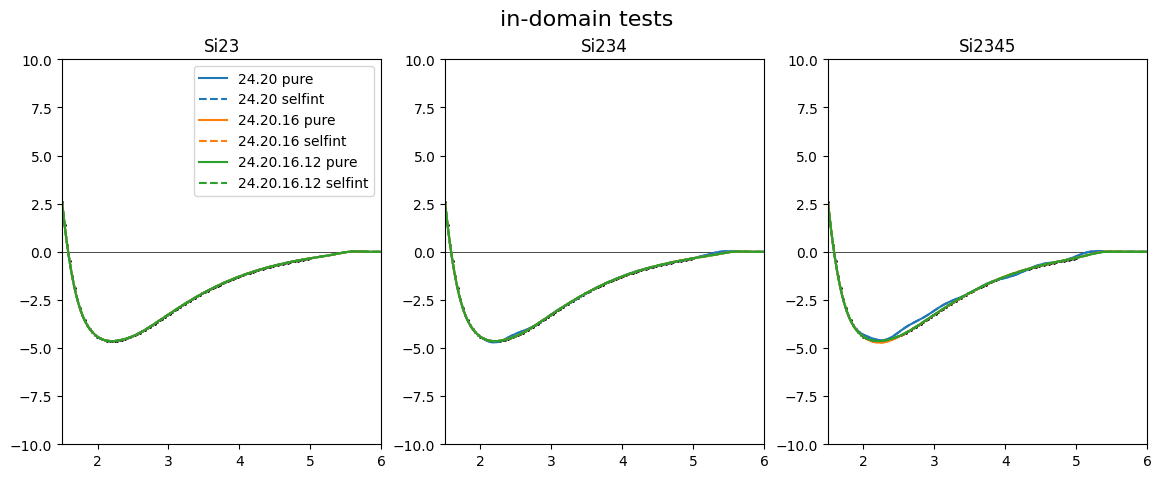

In [78]:
g,gax = plt.subplots(1,3, figsize=(14,5), dpi=100)
g.suptitle('in-domain tests', fontsize=16)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
dsets = ['Si23', 'Si234', 'Si2345']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(dset)
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    for j, basis in enumerate(basis_tags):
        # Load
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        # Plot
        axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
axes_flat[0].legend(fontsize=10)


# Scratch

In [41]:
bins3d

array([ 4.,  6., 11., 17., 29., 44., 43., 53.,  1.,  0.,  3.,  1.,  1.,
        0.,  4.,  3.,  1.,  4.,  0.,  2.,  3.,  4.,  3.,  4.,  4.,  1.,
        4.,  4.,  1.,  1.,  3.,  2.,  4.,  2.,  0.,  3.,  1.,  7.,  5.,
        3.,  2.,  1.,  0.,  1.,  3.,  1.,  1.,  1.,  3.,  1.])

In [59]:
test_list = [-0.22591865644758757, -0.09361538075930885, 0.15749446076591261, 0.15740018302130832, -0.0074983351524806055, -0.12527096671055188, -0.09362445517744741, 0.030810655231758223, 0.09692914731946609, 0.04714953439533586, -0.03449728186090149, -0.05717805029492373, -0.023655053369226558, 0.01657868060823596, 0.03128504284933781, 0.020095791882869588, -0.0005853324608461528, -0.017406868850318835, -0.02327473335184207, -0.016128413090013633, 0.021101352054393147, 0.03899015424234936, -0.00990848789825198, -0.01574803777329813, -0.44890223310520216, -0.0802321416015122, -0.14355340853704293, -0.19250556940716898, -0.06078123550898401, -0.03649129796997652, -0.054039220807938104, -0.030637151053848177, -0.026671419891612782, -0.0015187673099618878, 0.007234656001292578, 0.0020829736116856658, 0.05092211172423499, 0.05418250161649867, 0.005606797906517159, 0.007587616750593076, 0.014854307558811114, 0.00922815520288259, 0.021182400726922943, -0.18690387375896364, -0.1607155061873437, -0.17800997910516586, -0.17545044562019937, -0.1164054271643247, -0.044349466511369035, -0.03152877590019005, -0.04482830702405096, -0.023560521096461905, -0.010548384241634247, -0.0075848436439430785, 0.023802844824990094, 0.017847824246150997, 0.01104003388274476, 0.0743874945418358, 0.03739830951051587, 0.025549882753596428, 0.063149969943019, 0.10271092818150568, 0.07849144163305466, 0.036545636879691236, 0.053699254288038276, 0.04934248006048472, -0.008195211994965179, -0.0064520105180137545, 0.020985634692756855, 0.010148707932948177, 0.0290890771764112, 0.015275233440205614, 0.016294322725434192, -0.00815465012910802, -0.028994108420755078, -0.012886690116979939, -0.019311666414085115, -0.029087212601786046, -0.007587537591968556, -0.02232013690643567, -0.01839059418381967, 0.028351534124150892, -0.03306123180798548, -0.01078986692882313, 0.001179051206335222, 0.03017373821464194, 0.04322050805390837, 0.037758788046074146, 0.01765579503268553, 0.12882331062500116, 0.022656334717948097, -0.01934007638678341, -0.018597873841885177, -0.053637588424794526, 0.0939182993750988, -0.004871830967750731, -0.07826450543270934, -0.026025922368057026, -0.024468148443711653, -0.024688684604514077, 0.011461537030606315, -0.0096726111507601, -0.007748969278905328, 0.023961015565367196, -0.021978105340229766, -0.027026883306629435, 0.045210814306442186, 0.038619832992430665, 0.03192679827296716, 0.01898993639784556, 0.03858793437606038, -0.004927918952469066, -0.060521102872889615, -0.0059650395686680615, -0.03677488025968558, -0.0653250530929479, -0.009670543216211707, -0.011799599825554988, -0.0345003403390741, 0.007349427132971478, 0.04130378400049602, 0.032583626294780434, -0.006278597871038864, -0.0017481635208525651, 0.024317206722557026, 0.04356417758260077, 0.025109793034002834, -0.013734159699983187, 0.012736195392865047, 0.0374388633550379, 0.049734911406798366, 0.04052324990531316, -0.01197632978066689, -0.011855258874070688, -0.001779012626230293, -0.03789003700045281, -0.017610500765397382, 0.021588388256810167, -0.013368855881615335, -0.034146196942924444, 0.013851141898605935, 0.002076477487950607, 0.020198761096882352, 0.008447178964751875, -0.023288007138907232, -0.014086704063297364, -0.02348457831482922, 0.005006416755213014, 0.014508937494748573, 0.08804369499058219, -0.016116190676351127, -0.04084111188860166, 0.013183123327420119, -0.0005501454268027182, -0.02489154976274151, 0.010610441612081817, -0.0017318810646109034, -0.018824159582311786, 0.014148452492206245, -0.000657514167991856, -0.01889258503482146, 0.016718871868052806, -0.0004138095569759594, -0.028406120911983634, 0.012709811177840693, -0.04261914920186383, -0.0729689357228089, -0.00044139870854411565, -0.004409496859175466, -0.03752836183361101, -0.016311220206097352, -0.010881138669072133, 0.003845200540234471, 0.025390376831475717, 0.011098769286746198, 0.01934797298679835, 0.014445109868380105, 0.03536112697923077, 0.019121064489361385, 0.046255823037543026, 0.057667115793322225, 0.0018720882485364263, 0.007308336081098362, 0.05266459057854193, 0.02729756310750643, -0.02041525951734103, -0.007879854231538197, -0.011335296573172131, -0.018716447943675496, -0.007006300043253996, 0.010995028935489192, -0.005929331762204166, -0.0026221269269033247, 0.007067758784117469, -0.04811889416969396, -0.06871523549312068, -0.009426018873560784, -0.009257097194060926, -0.030692901435825534, -0.018809058504930132, -0.018425637213165546, -0.01834413790820481, 0.009455500643402014, 0.009621822101561359, -0.009225042413224194, 0.005989825540624382, 0.0033727193503970644, 0.0137770612712563, -0.07555364711164066, -0.0009674109483490956, -0.05392542269538941, -0.056192941644703634, 0.01195936372380698, 0.0037933544601472633, -0.01835016883424325, 0.002953813939064722, 0.008709322873347785, -0.01509627401387319, 0.03927435424230452, 0.023056925516396397, 0.03219957526894663, 0.039206487574068055, 0.014679336472489783, -0.030601034796493596, -0.018133518928405562, -0.037508852208592264, 0.013455432566266976, 0.013704183168040803, 0.006717336405697323, -0.04492443340965379, -0.00853476202297885, -0.002752582325432852, -0.03666091972273485, -0.021358458910858753, -0.0017957285270470448, -0.01998273183580025, 0.009051679380740984, 0.017441712446840542, -0.017052085924281882, 0.018521886366028407, 0.026639320828193598, 0.002241549127522681, -0.057091509282276846, -0.045985115944211806, -0.002878771336654861, -0.030571232796867596, -0.023941723664655832, -0.008226408640290988, -0.014483043103249986, -0.018087625532531803, 0.040093175681461014, 0.029499436309859597, -0.0027338059632729624, 0.01963875749273397, 0.005166119877376901, -0.010467195268617736, -0.013936558611561513, -0.0332351048225846, 0.0005551967721514494, 0.022042597110692903, -0.011636940397017946, -0.0009689929758358249, 0.030021419521484356, 0.01695265271984673, -0.016954312196576265, 0.030711722633068463, 0.017748425768721057, -0.056361775760026205, -0.06230366393718008, -0.013282825397179733, -0.016892715394220926, 0.0956735985232603, -0.041436101600243504, 0.006745175700491546, -0.005960233915890586, 0.010997174073757696, 0.013715700945553744, 0.01241990242269548, -0.010429392022196438, -0.006955301974484944, 0.003732249425971111, 0.0069657612353211315, -0.03147585748172721, -0.014084030633009736, -0.0018435148551547847, 0.012306240613066033, 0.008829856315875989, 0.007297855570638067, 0.004448555627989002, -0.011102502512999502, -0.036185271949211256, -0.03376776472137906, -0.009982741870844206, -0.004649245956601388, -0.012260523392964698, 0.005957547322748664, 0.015489036194968357, -0.3849392039299426, -0.0662315639314491, -0.12963886593363633, -0.1569217937763119, -0.05614767064101748, -0.034960624656332664, -0.034132755372779336, -0.015429943577297192, -0.016338445588708436, 0.0045741682172843025, 0.023931726780491304, 0.03995933612427318, 0.0352484668914625, -0.03278699381990568, -0.07592370520812469, -0.08948677526864246, -0.0885065735902235, -0.08992937844934329, -0.07121553146290131, -0.025751972634228976, -0.01692047979105617, -0.021584303942248844, -0.007691905644455845, -0.016819007188813396, 0.010765139775029782, 0.0007760286847338544, 0.018532976693420463, 0.044182171609573925, 0.03307929489626513, 0.01063284876887012, 0.02295268024672412, 0.014484937883338427, -0.014938138814740366, 0.009062405656866473, 0.020503449846583695, -0.013692010672199911, -0.01220462895797491, 0.0008076115566312076, -0.030721156765836886, -0.004365613076340423, 0.01872242879072322, 0.0033735983281073805, -0.03231351031912427, -0.021763587201239904, -0.003370150451097753, -0.01255131713366158, -0.021566457919755373, 0.00047426887089913505, 0.009431474073216898, -0.019281741561001337, -0.012502022956048105, 0.009020482071746121, -0.006867953755894775, -0.019265844744517747, -0.042669735829263755, -0.008500103325849384, -0.023426081310266616, -0.049398079543289716, 0.0009982872505818609, 0.04022933405351392, -0.014116528533254952, 0.024007082994575414, 0.04590724818633313, 0.03750612441094187, 0.026888296512601273, 0.05485758048728649, 0.027332137639303856, -0.01496895853009515, -0.015620823050138713, -0.005936041335528294, -0.0057822663982574195, -0.03160469758685022, 0.004613146234545462, 0.009224209815532597, -0.016094069145094966, -0.019402025110732912, -0.011465835145585147, -0.005632323262944221, -0.025713467691297554, -0.033144511127296265, -0.03855466963711412, -0.04594651871239537, -0.014109967660075409, 0.006066177664461859, -0.004209425516533441, -0.02863351561605016, -0.026554839733703865, 0.0629061184610712, 0.013725910378681221, 0.033025110759929, 0.04245568887359968, -0.026947483374527025, -0.051824515357119, 0.0034741868941151974, 0.004544156734993572, -0.01213499320966237, -0.01930210256696086, -0.030477611292267642, -0.018703741108013525, -0.020527790794023087, -0.01284947482916742, 0.00035986030446126814, -0.03347174911658214, 0.001948907167288612, -0.00964168435535149, -0.008707631844132039, 0.02263251058594079, 0.005444406642676848, -0.002678261095236277, -0.014657127332029334, -0.009764621937899507, -0.017285373961895632, -0.019002882524364356, -0.018656206349918204, -0.053740124959630084, -0.002128206029298948, -0.035238973435989605, -0.020217025936671375, 0.007020661349325915, -0.009516755667869718, 0.007827406077132726, -0.013127729891535522, -0.007503935115069066, -0.01929032827252505, -0.044606868336697636, 0.0667325044156219, -0.0927987728252206, 0.08951697549845368, -0.019544626182845953, 0.09753196146780685, 0.010451689893742833, 0.0428019055172265, -0.05727953439373892, 0.050915505174498964, -0.05998952022370959, 0.0840555846517512, -0.031771926837207295, -0.009831834841242034, 0.009220789785072892, 0.0022322292504595776, -0.0016834251556207742, 0.015758393764960042, 0.008187384134531569, 0.007652100243506308, 0.013805642569261914, 0.0012859365749862302, -0.02763280032952071, 0.01675682473897737, 0.020940367580690435, 0.013223908842699835, 0.07999319551446753, 0.008487740406055396, -0.024354706316816136, 0.0536839496990612, 0.008817182269181002, -0.04333197850188335, -0.07647123811456903, -0.04395842474146097, -0.0010208571139188594, 0.1461293236277814, -0.020834081791712717, -0.017853927524515464, 0.02891873226789477, 0.026798438417045177, -0.02345692494871802, -0.0330047485926199, -0.06298388334884737, -0.06197998876049682, 0.05189089151778552, 0.014976501673599724, 0.003140518026731197, 0.06918505407913596, -0.09292582579674478, -0.007451687547941114, -0.06715496231835058, -0.05302876638028163, 0.019780796212261188, -0.004556518280931044, -0.0119495605253083, 0.00624683566923564, 0.0014000354263941789, 0.03827065732291481, -0.07681414505903657, -0.010641836104953343, 0.023225283062425082, -0.08021903356729462, 0.11849093300509261, -0.04164944339802321, 0.08285933114199023, -0.043642614809214664, -0.004410796506370658, 0.08734650164725871, 0.02941701101989134, -0.04025662500459658, -0.04472787745674678, 0.00885428134268554, -0.0038501878951123607, -0.038515703453319845, -0.0456838067820199, -0.0011228732443636234, 0.04813234758454487, -0.03846474302885242, 0.04068783863798692, -0.013226621688619804, 0.07202810598803613, -0.053297918772244525, 0.021551364494592835, -0.03751937514776282, -0.004719587466084716, -0.05723777792954691, 0.008704132407087867, 0.015251468182315283, 0.028851019620124468, 0.07743840862239848, -0.028949584561960354, -0.06794353383911464, -0.028905212479242534, -0.011461844899674908, -0.014063678668910173, -0.013073128062351554, -0.0009740662907323891, 0.04895095742526797, -0.05886167947305303, 0.007495498337937774, -0.01565043860800821, 0.051121518090154035, -0.016366168143942563, 0.015116101746939278, 0.0034311468203205514, -0.006476447616193944, -0.04299405402440325, -0.0054688770256892385, 0.07100463569489911, -0.08358151529096215, 0.03778814383145538, 0.06817163884784154, -0.03561914556108681, 0.059049212553034205, 0.013384800898478266, -0.014245006438031988, -0.043179354444819046, -0.053515260643975784, 0.017281188134419468, -0.01975742830431287, -0.01685476126903767, -0.012869439173635748, -0.062442694250535044, 0.0363271312868092, 0.2455060197977215, -0.02937114402593049, -0.018182892170847596, 0.09910382433288081, -0.10803583225472659, 0.02146631775971953, -0.008887069252796054, -0.021885551627922835, 0.006062438525756102, 0.023290703552830215, 0.035362950833561425, -0.010914420890453684, -0.07076143399702203, 0.03678800416141946, -0.030423001156594506, 0.02240444911413375, -0.03918380807899352, -0.004077437322095997, 0.015061779187654495, 0.003415779109263605, 0.0631019626682755, 0.009017381878088208, -0.023240932718950957, 0.06458721833981859, -0.026226549948280057, 0.08657583594183402, 0.01452306670004904, -0.01490083581635743, -0.05132155513153064, -0.03024913122917264, -0.007285056780728302, 0.032872684314778584, 0.051283469477264865, 0.05192670182298515, -0.007879949667845878, -0.01680559597274923, 0.02855943907751744, 0.055133969076194125, 0.01511663759968936, 0.009349283248585848, 0.05989815862032863, 0.10311423924848205, 0.0883752828985045, 0.019886676935873603, 0.021687558334464216, -0.01440619679061563, -0.025719475385138635, 0.004450310434507323, 0.07834707423272222, -0.14627014802428048, 0.005731490605817428, -0.03012112052977839, 0.055190041420747085, -0.11389027604347216, -0.05704068809705448, -0.043954335215868535, -0.05397641125745525, 0.04863124925797716, 0.006085054743664018, -0.04729435871114718, 0.07757403214570775, -0.051723668171543426, -0.04010749990020208, -0.005420609406479977, 0.033750072880277614, 0.11853755008843714, -0.00520712202002296, 0.06571729926745476, 0.05753698976528573, 0.02860688410147022, 0.034987774163642814, 0.0817556937165149, 0.060937496464715975, 0.001959220930376603, -0.0022427368963846904, 0.013667879776017603, -0.03549008013337876, -0.05873607993204055, 0.06514786444569753, 0.035313403116296785, -0.030290540174509054, -0.0033947092285181186, 0.07123790534370568, 0.030386367897336255, -0.03918084540646607, 0.057039811299057275, 0.08358102532766197, 0.026576495592003715, 0.0016992480956390275, 0.02821373033487224, 0.029377553849765346, -0.09065346848512017, -0.0416380543453532, -0.03127558509565801, -0.0275900004138461, 0.008055018090621294, -0.025233336949316933, -0.000502154586441724, 0.056526214669835685, 0.0034742203832395873, -0.004265448815071261, 0.03313660705732418, -0.025624032119329274, -0.05430366973566615, -0.01185412214850877, -0.008896004036360207, -0.02635911564677942, 0.005292759948285781, 0.0070216360493827665, 0.017564492015134752, 0.0475417025677849, -0.07040810463829791, -0.035347514189834194, -0.04580047913794326, 0.001474212504152243, 0.03594905009478418, -0.005318023141717185, 0.055422184574914345, -0.003297508975818699, -0.011090451138026734, -0.05903379896168333, 0.018687575014429043, -0.055958870784522975, -0.0051153432503519, 0.021717799960240508, 0.0024843840805456176, -0.0001269541301680809, -0.02684617952327943, -0.041360547823538256, -0.05034151947930536, -0.030219360454624953, -0.03174006596020236, 0.04511352542626398, 0.01900208490491124, 0.042891196256279525, 0.0429425984007627, -0.07845943369614469, 0.04648313158725461, -0.03866258488797111, 0.005022912440432582, 0.05943576297317043, -0.012410948481787129, 0.059202437051398056, 0.07454939031894273, 0.008598224889222189, -0.04015219949257318, -0.020684917104057208, -0.027778088771499343, -0.03680566144725147, -0.027058509222939398, 0.06713524667258686, 0.0418330940037613, -0.07416497202681438, 0.030556204687421262, 0.008313312689901335, -0.017045794385416126, -0.023872403935483746, -0.008654999456679264, -0.025180806855980557, -0.007195964827355666, -0.007597504005749788, 0.04681811660809957, -0.006145945124820371, -0.004271648002236284, 0.012105144585570592, 0.002048779669235744, -0.025215097702693656, 0.05373376023536242, -0.028206344652705988, -0.034442947579619576, 0.013646709184228174, -0.02325980055650058, -0.003662891285219253, 0.010042851838527827, -0.036712632524561105, 0.023979545635571906, 0.02949518308323753, 0.00025834591829513887, 0.05189266802009628, -0.01726468990768853, -0.01847212141963823, -0.025656837128705333, 0.0748827293684431, -0.08676794532606158, 0.01784513204416966, 0.04821743599835822, -0.09120481542872823, -0.016156292642019437, -0.04027724831606782, -0.04427120359777711, 0.017461547000755362, -0.04462089173938341, -0.050621437836763816, -0.031224652089212754, -0.051840003535735237, 0.059365108563515234, -0.03653610638064755, -0.10547532173031196, -0.012785273528996879, 0.0012917537518150253, -0.013177279200004216, -0.027756799219722145, -0.012395100938096986, 0.021994851145048844, -0.010754819855118338, -0.0053419457512642095, 0.010847394617143328, -0.01902003484011208, 0.0012532458405129033, -0.02163982258365212, -0.036851119815666286, -0.04039478795650273, -0.009212420038467478, 0.027840101765905435, -0.00431740147999845, -0.03030777804790453, 0.014281115300933529, 0.060258166435688425, 0.008155562077187616, -0.06614231231373009, 0.014942250779479341, 0.03636902023810064, 0.010612829399997801, -0.006743385927499889, 0.004122681889851855, 0.06524225195445398, 0.04598812388815494, 0.032610847567527364, -0.03526217939764394, 0.018285787697407595, -0.015400107837350104, -0.025348309592708177, 0.01825908411962049, 0.05755611798323096, -0.02457821405019582, 0.016442158779023733, -0.007729357437227372, -0.010591208154431517, -0.04423357527682156, 0.017776185577842482, 0.0056031889231143075, 0.0030171971645669812, -0.039942911142076064, 0.03541581655567977, -0.012228495966793537, 0.010501402869197847, -0.023935683503714573, -0.010652732276355902, -0.04386700902539601, -0.02670319183153245, -0.008888251392742541, 0.02146817476130814, -0.04490666421746046, 0.019566690202698977, 0.00847331637375414, 0.002456162890030503, 0.033893546471826554, -0.16777179989826993, -0.0341203296031665, -0.08199216393884322, -0.08425215043948048, -0.03245697139213976, -0.030806136352625288, -0.010953344836359883, 0.027635543345993958, 0.004651600261095146, -0.021642157643848865, -0.027195172081195363, -0.019375793932631013, -0.03711799760655789, -0.043571496278167476, -0.02083064652644085, -0.01260347098703309, -0.018233955188212254, -0.0015420802376773935, -0.005015462288879006, 0.0025586439304419503, -0.011109464442432142, -0.009301163077476778, 0.012930343430501569, -0.0009512276351897575, -0.02830021051536365, -0.0259967379618843, -0.028952014239666403, -0.023136250014777742, -0.000529013863441033, 0.0453205515291919, 0.019718042771309664, -0.003639137095493064, 0.004702807735619726, 0.018472758393397782, -0.008655749517960077, -0.0064737147815835455, 0.0037236957205891807, -0.016751689173638718, 0.0006421462314050806, 0.012617942498944013, -0.0026717038370372673, -0.013465632919397825, 0.01394930493483934, 0.02660054891265165, -0.03189893781886179, -0.014677063874485053, -0.008182390047125801, 0.03131261204819287, -0.01302465836185862, 8.888073939025557e-6, 0.007867154851190123, -0.029054243019461645, -0.0199322870777124, 0.03768110983608836, 0.03105843422914744, -0.004063291563960257, -0.0065251574179771826, -0.017574971696530554, -0.023675912278348313, -0.023071057601719243, -0.002724304619310252, -0.0011611206796169544, 0.04045988547856487, 0.03761937804876319, 0.016223715620119015, 0.0457906817239469, -0.0006021819423277464, 0.01014375174528992, -0.0020008942614255466, 0.006191194048702902, 0.030083968933590756, 0.014873575467118698, 0.00921383663849216, 0.015011342395136145, -0.03402593463360358, -0.0023711070876154673, -0.0007032832342693143, -0.0035616652056132477, -0.016509710821488204, 0.013741143210388666, 0.00214938669973508, -0.01206287664196638, 0.037477889605041864, 0.012704765696001784, 0.0333349064657469, -0.04175034027057164, -0.031234001258161205, -0.028198401017712104, -0.016637608700868046, 0.05938163593016233, 0.06248999704683261, 0.09925416265219811, -0.011188531783003473, -0.0005314697766421908, -0.05394343173301522, 0.01114842599609378, -0.060387253411402164, -0.028275646075388003, -0.01568294542520106, -0.06846194879174623, -0.009882568662147555, 0.0270255812166922, -0.02179792858273235, 0.02652583390282643, 0.010132830908181322, 0.05195042108277956, 0.015578009520088086, 0.04937502121021345, 0.00274255046815944, 0.03849358425235214, 0.0032639185109485025, -0.04128046216110033, 0.007140172339162037, 0.05638442750793365, 0.031762735645541045, -0.0024645976143326488, -0.011199626604626508, 0.10470152861797141, 0.025722958578657126, 0.045065366348300835, 0.0042999060149079135, -0.006579236263315871, 0.04341442133630195, 0.004730524596935391, -0.05417947009365226, -0.03970193710276804, -0.005035832935090894]

In [60]:
len(test_list)

929